In [29]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [30]:
seismic_acq_prcs_clmn = ['NUM','id','seismic acq grades']
geo_az_clmn = ['NUM','id','geo CC1 ','geo CC2','geo CC3']
data_signal_clmn = ['NUM','id', 'data signal grades','CC2','CC3']
acoustics_clmn = ['NUM', 'id', 'acoustics grades']
geomechanics_clmn = ['NUM','id','geomechanics grades','NaNs']
well_production_clmn = ['NUM','id','well production']
OG_project_managment_clmn = ['NUM','id','O&G project managment']
marketing_clmn = ['NUM','id','marketing CC1','marketing CC2', 'marketing CC3']
names_clmn = ['NUM','id','surname','name']

In [31]:
seismic_acq_prcs = pd.read_excel('C:/Users/User/Desktop/machine learning/csv/.vscode/L3-020_Seismic acquisition and processing STS (1).xlsx',sheet_name=['GE','PE'], header=None, names = seismic_acq_prcs_clmn)
ge_az = pd.read_excel('C:/Users/User/Desktop/machine learning/csv/csv.ipynb/L3-020_Geology of Azerbaidjan STS.xlsx',sheet_name= ['GE','PE'], header = None, names = geo_az_clmn)
data_signal = pd.read_excel('C:/Users/User/Downloads/L3 PE Data Acquisition and Signal Processing.xlsx',header = None, names = data_signal_clmn)
acoustics = pd.read_excel('C:/Users/User/Desktop/L3-020_Grade sheet - Acoustics STS.xlsx',header=None,names=acoustics_clmn)
geomechanics = pd.read_excel('C:/Users/User/Desktop/machine learning/csv/csv.ipynb/L3 PE-020 Geomechanics for drilling and reservoirs.xlsx',sheet_name = ['CE','CS','GE','PE'], header=None,names=geomechanics_clmn)
well_production= pd.read_excel('C:/Users/User/Downloads/L3 grade sheet Well Production STS.xlsx',header=None,names=well_production_clmn)
OG_project_managment = pd.read_excel('C:/Users/User/Downloads/L3PE Oil and Gas Project Management STS.xlsx',header=None,names=OG_project_managment_clmn)
marketing = pd.read_excel('C:/Users/User/Downloads/Marketing S2 2024 Results STS (1).xlsx',sheet_name = ['CE','CS','GE','PE'], header=None,names=marketing_clmn)
seismic_acq_prcs = seismic_acq_prcs['PE']
ge_az = ge_az['PE']
geomechanics = geomechanics['PE']
marketing = marketing['PE']
names = pd.read_excel('C:/Users/User/Desktop/names.xlsx',header=None,names=names_clmn)

In [32]:
#seismic_acq_prcs = seismic_acq_prcs.drop(0)
names = names.drop('NUM',axis=1)
names = names.iloc[2:]
names = names.dropna()
seismic_acq_prcs = seismic_acq_prcs.drop('NUM',axis = 1)
seismic_acq_prcs = seismic_acq_prcs.iloc[7:]
seismic_acq_prcs = seismic_acq_prcs.dropna()
ge_az = ge_az.drop('NUM',axis=1)
ge_az = ge_az.iloc[7:]
ge_az = ge_az.dropna()
data_signal = data_signal.drop('NUM', axis = 1)
data_signal = data_signal.iloc[8:]
data_signal = data_signal.drop(['CC2','CC3'],axis = 1)
data_signal = data_signal.dropna()
acoustics = acoustics.drop('NUM',axis=1)
acoustics = acoustics.iloc[8:]
acoustics = acoustics.dropna()
acoustics = acoustics.replace({'abs':0})
geomechanics = geomechanics.drop(['NUM','NaNs'],axis=1)
geomechanics = geomechanics.iloc[8:]
geomechanics = geomechanics.dropna()
geomechanics = geomechanics.replace({'abs':0})
OG_project_managment = OG_project_managment.drop('NUM',axis=1)
OG_project_managment= OG_project_managment.iloc[8:]
well_production = well_production.drop('NUM',axis=1)
well_production = well_production.iloc[8:]
well_production = well_production.dropna()
marketing = marketing.drop(['NUM'],axis=1)
marketing = marketing.iloc[8:]
marketing = marketing.dropna()
marketing['Marketing Final'] = marketing['marketing CC1']*0.1 + marketing['marketing CC2']*0.4 + marketing['marketing CC3']*0.5 

In [33]:
avg = [names,seismic_acq_prcs,ge_az,data_signal,acoustics,geomechanics,well_production,OG_project_managment,marketing]
average = reduce(lambda left,right:pd.merge(left,right,on=['id'],how='outer'),avg)
average = average.dropna()
average['Average out of 30'] = (average['seismic acq grades']*2 + average['geo CC3']*2 + average['data signal grades']*1 + average['acoustics grades']*1 + average['geomechanics grades']*2 + average['well production']*2 + average['O&G project managment']*2 + average['Marketing Final']*1) / 15
average['Average out of 20'] = average['Average out of 30'] * 10/20
average

,id,surname,name,seismic acq grades,geo CC1,geo CC2,geo CC3,data signal grades,acoustics grades,geomechanics grades,well production,O&G project managment,marketing CC1,marketing CC2,marketing CC3,Marketing Final,Average out of 30,Average out of 20
0,22023071.0,ABBASOVA,NARGIZ,12.5,19,10,14.5,6.5,1.0,4.12,8,9,20,20,20,20.0,8.249333,4.124667
1,22023126.0,AHMADOV,EMIL,17,19,11,15,20,0.0,7.05,8,10,20,18,17,17.7,10.12,5.06
2,22023067.0,ALAKBARLI,RASUL,10.5,16,10,13,12.25,5.0,1.12,12,11,20,16,14,15.4,8.526,4.263
3,22023077.0,ALIYEV,NIHAD,15.5,16,11,13.5,12.75,3.0,4.55,12,9,20,16,14,15.4,9.35,4.675
4,22023011.0,ALIYEVA,LAMAN,14,17,8,12.5,10.25,14.0,0.90,10,10,20,20,20,20.0,9.27,4.635
5,22023131.0,ALIYEVA,MATANAT,14,18,7,12.5,8.25,4.0,3.00,6,6,20,18,20,19.2,7.63,3.815
6,22022935.0,CHOBANOV,KANAN,15,16,9,12.5,16.5,15.0,6.44,10,9,20,16,14,15.4,10.185333,5.092667
7,22023142.0,GALAYEVA,AYSHA,18,18,9,13.5,20,20.0,12.00,14,14,20,20,20,20.0,13.533333,6.766667
8,22023124.0,GASIMLI,HUSEYN,13,17,9,13,16.5,9.5,2.00,8,10,20,15,14,15.0,8.866667,4.433333
9,22023078.0,GURBANOV,ASGAR,15,16,7,11.5,20,16.0,8.60,9,10,20,18,17,17.7,10.793333,5.396667


In [34]:
def optimise_k_means(data,max_k):
    means = []
    inertias = []
    for k in range (1,max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(average)

        means.append(k)
        inertias.append(kmeans.inertia_)

        fig = plt.subplots(figsize=(10,5))
        plt.plot(means,inertias,'o-')
        plt.xlabel('Number')
        plt.ylabel('Inertia')
        plt.grid('True')
        plt.show()

In [35]:
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(average[['seismic acq grades', 'geo CC3', 'data signal grades', 'acoustics grades', 'geomechanics grades',	'well production',	'O&G project managment']])

KMeans(n_clusters=3)

In [36]:
average['kmeans_3'] = Kmeans.labels_
average

,id,surname,name,seismic acq grades,geo CC1,geo CC2,geo CC3,data signal grades,acoustics grades,geomechanics grades,well production,O&G project managment,marketing CC1,marketing CC2,marketing CC3,Marketing Final,Average out of 30,Average out of 20,kmeans_3
0,22023071.0,ABBASOVA,NARGIZ,12.5,19,10,14.5,6.5,1.0,4.12,8,9,20,20,20,20.0,8.249333,4.124667,1
1,22023126.0,AHMADOV,EMIL,17,19,11,15,20,0.0,7.05,8,10,20,18,17,17.7,10.12,5.06,0
2,22023067.0,ALAKBARLI,RASUL,10.5,16,10,13,12.25,5.0,1.12,12,11,20,16,14,15.4,8.526,4.263,0
3,22023077.0,ALIYEV,NIHAD,15.5,16,11,13.5,12.75,3.0,4.55,12,9,20,16,14,15.4,9.35,4.675,0
4,22023011.0,ALIYEVA,LAMAN,14,17,8,12.5,10.25,14.0,0.90,10,10,20,20,20,20.0,9.27,4.635,2
5,22023131.0,ALIYEVA,MATANAT,14,18,7,12.5,8.25,4.0,3.00,6,6,20,18,20,19.2,7.63,3.815,1
6,22022935.0,CHOBANOV,KANAN,15,16,9,12.5,16.5,15.0,6.44,10,9,20,16,14,15.4,10.185333,5.092667,2
7,22023142.0,GALAYEVA,AYSHA,18,18,9,13.5,20,20.0,12.00,14,14,20,20,20,20.0,13.533333,6.766667,2
8,22023124.0,GASIMLI,HUSEYN,13,17,9,13,16.5,9.5,2.00,8,10,20,15,14,15.0,8.866667,4.433333,0
9,22023078.0,GURBANOV,ASGAR,15,16,7,11.5,20,16.0,8.60,9,10,20,18,17,17.7,10.793333,5.396667,2


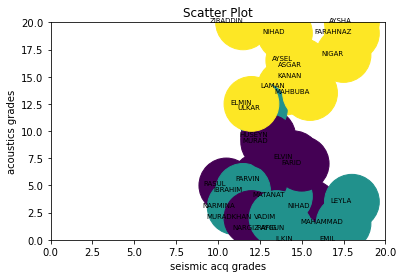

<Figure size 1080x1080 with 0 Axes>

In [37]:
for i in range(len(average)):
    plt.annotate(average['name'][i], (average['seismic acq grades'][i], average['acoustics grades'][i]), fontsize=7, ha='right')
plt.scatter(x=average['seismic acq grades'], y= average['acoustics grades'], c=average['kmeans_3'],s=3000)
plt.title("Scatter Plot") 
plt.xlabel('seismic acq grades')
plt.ylabel('acoustics grades')
plt.xlim(0,20)
plt.ylim(0,20)
plt.figure(figsize=(15, 15))
plt.show() 